In [5]:
library(tidyverse)
install.packages("lubridate")  
library(lubridate)
library(dplyr)
library(readr)
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



**Introduction:**
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and fully describe the dataset that was used to answer the question

## **Methods & Results:**
- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
- your report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all figures should have a figure number and a legend

### **Load Data** 

In [6]:
players <- read_csv("https://raw.githubusercontent.com/Elvis614412/Dsci-100-group-project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Elvis614412/Dsci-100-group-project/refs/heads/main/sessions.csv")

merged_data <- left_join(players,sessions, by = "hashedEmail")

merged_data <- merged_data|>
    select(-hashedEmail,-original_start_time,-original_end_time)
    merged_data$Age[is.na(merged_data$Age)] <- mean(merged_data$Age, na.rm = TRUE)

head(merged_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,name,gender,Age,start_time,end_time
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35
Pro,TRUE,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25
Pro,TRUE,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17


### **Summary & Visualization of Dataset for Q1**

### **Summary & Visualization of Dataset for Q2**

In [7]:
# summary of the data set that is relevant for exploratory data analysis related to the planned analysis
tidy_player_dataset <- players |> 
    mutate(experience = as_factor(experience), 
           subscribe = as_factor(subscribe), 
           gender = as_factor(gender)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))

head(tidy_player_dataset, 5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Subscribed,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,Not Subscribed,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Subscribed,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,Subscribed,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


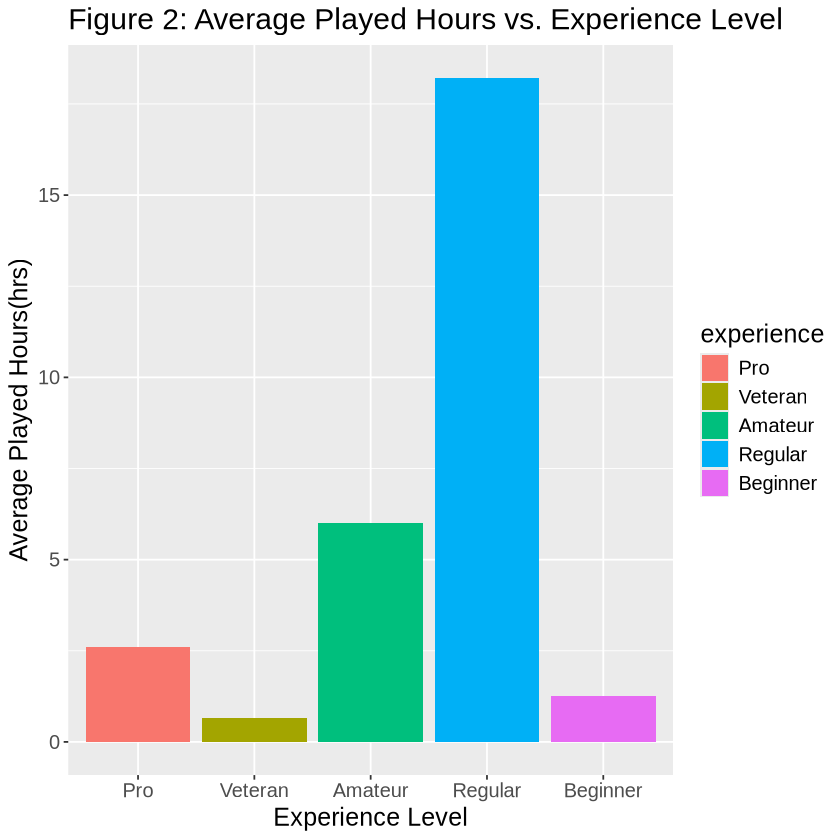

In [9]:
# visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
avg_played_hours <- tidy_player_dataset |>
  group_by(experience) |> 
  summarise(avg_hours = mean(played_hours, na.rm = TRUE))


experience_bar <- ggplot(avg_played_hours, aes(x = experience, y = avg_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Figure 2: Average Played Hours vs. Experience Level",
       x = "Experience Level",
       y = "Average Played Hours(hrs)") +
  theme(text = element_text(size = 15))

experience_bar

### **Summary & Visualization of Dataset for Q3**

### **Summary & Visualization of Dataset for Q4**

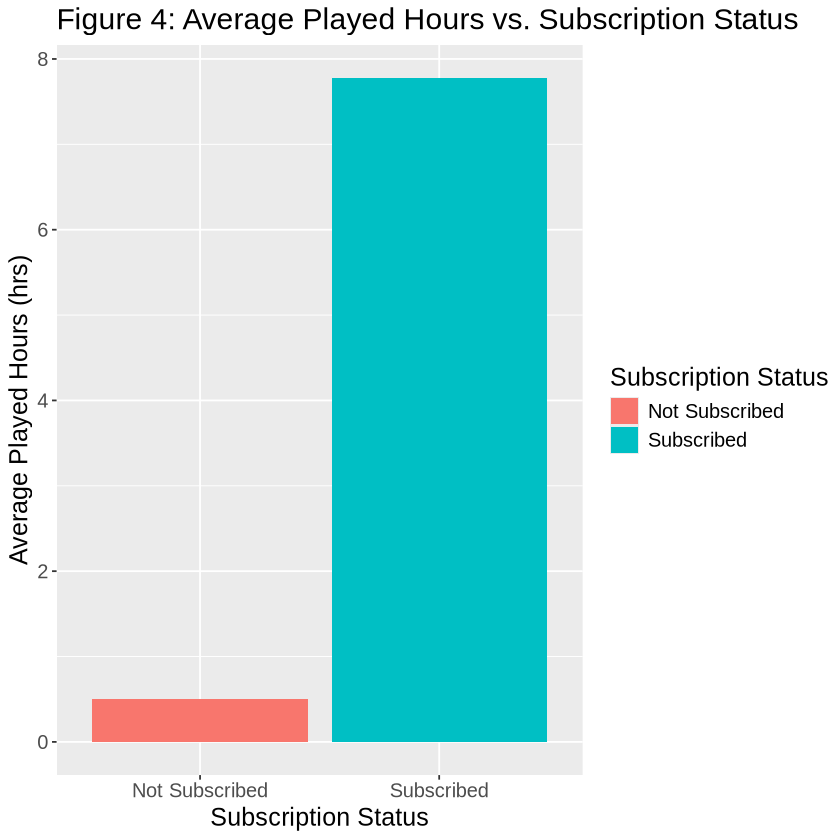

In [11]:
# Compute average played hours by subscription status
avg_played_hours_sub <- tidy_player_dataset |>
  group_by(subscribe) |>
  summarise(avg_hours = mean(played_hours, na.rm = TRUE)) 

# Create the bar plot
sub_bar <- ggplot(avg_played_hours_sub, aes(x = subscribe, y = avg_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(title = "Figure 4: Average Played Hours vs. Subscription Status",
       x = "Subscription Status",
       y = "Average Played Hours (hrs)",
       fill = "Subscription Status") +
  theme(text = element_text(size = 15))
sub_bar

**Discussion:**
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

**References**
You may include references if necessary, as long as they all have a consistent citation style.